In [1]:
import pandas as pd #importing library for reading the dataset
import matplotlib.pyplot as plt # a library for visualizations
%matplotlib inline 

In [2]:
# reading the file , only reading the useful columns from the file 
df = pd.read_csv('classification.csv', usecols = ['classification', 'mean', 'std_dev', 'points>100', 'ratio'])
df.head() #seeing the first 5 samples of the dataset

,classification,mean,std_dev,points>100,ratio
0,1.0,1.557790,12.066792,1,7.576087
1,1.0,0.190018,1.278398,0,11.518519
2,2.0,38.721106,177.520652,135,0.089371
3,1.0,424.518272,1942.694680,120,7.473988
4,2.0,924.555161,2672.120321,21,0.625000


In [3]:
# checking if there are null values in any column 
df.isna().sum()

classification      1
mean                2
std_dev            14
points>100          0
ratio             331
dtype: int64

In [4]:
#filling the missing values with the mean of respective column, inplace = True means it will update the original dataset
df.fillna(df.mean(), inplace = True)

In [5]:
df.isna().sum()

classification    0
mean              0
std_dev           0
points>100        0
ratio             0
dtype: int64

In [6]:
df['classification'].value_counts()

1.000000    848
2.000000    399
1.319968      1
Name: classification, dtype: int64

In [7]:
df['classification'] = df['classification'].map(lambda x: int(x)) # converting all values to discrete value , if there is any continous value, it will be converted to a discrete value

In [8]:
df['classification'].value_counts()

1    849
2    399
Name: classification, dtype: int64

In [9]:
import seaborn as sns #a library for visualizations

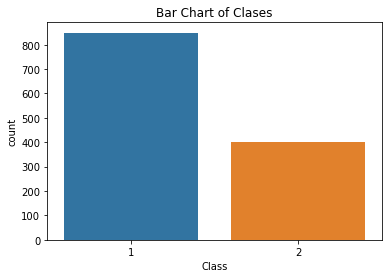

In [10]:
# bar chart showing the number of samples of each class in the dataset
plt.title('Bar Chart of Clases')
sns.countplot(df['classification'])
plt.xlabel('Class')
plt.show()

In [11]:
# showing the statistical summary of the dataset
df.describe()

,classification,mean,std_dev,points>100,ratio
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,1.319712,415.946400,792.886329,76.105769,4.197784
std,0.466552,988.032283,1248.732782,286.273606,12.797980
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.058243,14.964439,0.000000,0.171485
50%,1.000000,77.664873,264.355161,8.000000,1.316057
75%,2.000000,323.974037,900.586539,40.000000,4.197784
max,2.000000,8875.938718,7495.420377,3224.000000,205.000000


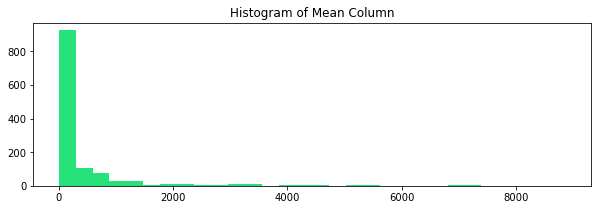

In [12]:
#histogram shows the distributiion of the dataset
plt.figure(figsize=(10,3))
plt.title('Histogram of Mean Column')
plt.hist(df['mean'], bins = 30, color = '#27E179')
plt.show()

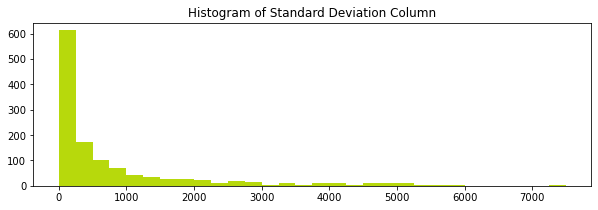

In [13]:
#histogram shows the distributiion of the dataset
plt.figure(figsize=(10,3))
plt.title('Histogram of Standard Deviation Column')
plt.hist(df['std_dev'], bins = 30, color = '#B7D90C')
plt.show()

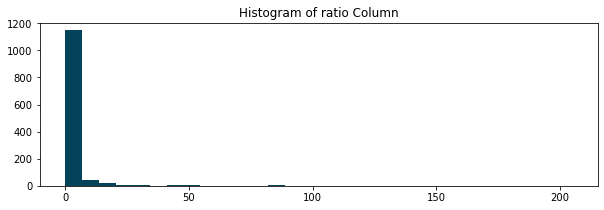

In [14]:
#histogram shows the distributiion of the dataset
plt.figure(figsize=(10,3))
plt.title('Histogram of ratio Column')
plt.hist(df['ratio'], bins = 30, color = '#02435A')
plt.show()

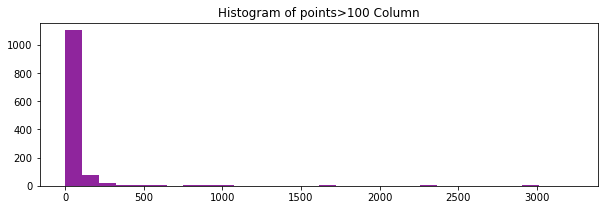

In [15]:
#histogram shows the distributiion of the dataset
plt.figure(figsize=(10,3))
plt.title('Histogram of points>100 Column')
plt.hist(df['points>100'], bins = 30, color = '#8F259D')
plt.show()

<AxesSubplot:xlabel='mean', ylabel='std_dev'>

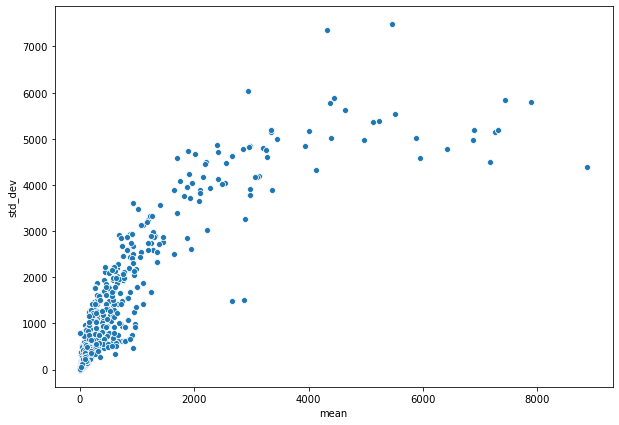

In [16]:
# scatter plot of mean and standard deviation 
plt.figure(figsize=(10,7))
sns.scatterplot(df['mean'], df['std_dev'])

# Handling the biasness

As the dataset is imbalanced , so we are using Oversampling technique, in which we add samples from the dataset to the class which has lower samples and balance them.

In [17]:
count_class_1 , count_class_2 = df['classification'].value_counts()
count_class_1, count_class_2

(849, 399)

In [18]:
class_1 = df[df['classification'] == 1]
class_2 = df[df['classification'] == 2]

class_2_oversampled = class_2.sample(count_class_1, replace = True)
df2 = pd.concat([class_1, class_2_oversampled],axis = 0)

# Seperating the dependent and independent variables, X will have independent variables and y will have dependent variable
X = df2.drop('classification', axis = 1)
y = df2['classification']

In [19]:
y.value_counts()

2    849
1    849
Name: classification, dtype: int64

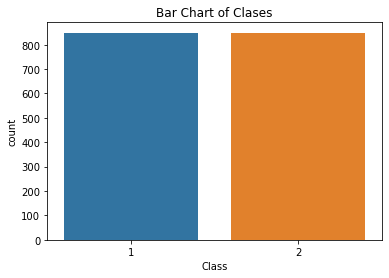

In [20]:
# bar chart showing the number of samples of each class in the dataset
plt.title('Bar Chart of Clases')
sns.countplot(df2['classification'])
plt.xlabel('Class')
plt.show()

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix , classification_report

# SVM Classifier

In [22]:
from sklearn.svm import SVC
clf = SVC() 
cv_results = cross_validate(clf, X, y, cv=3)
svm_acc_bef =  cv_results['test_score'].mean()
svm_acc_bef

0.5736160188457008

# kNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) # giving n_neighbours as 3 
cv_results = cross_validate(clf, X, y, cv=3)
knn_acc_bef = cv_results['test_score'].mean()
knn_acc_bef

0.5736160188457008

# AdaBoost Classifier

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
cv_results = cross_validate(clf, X, y, cv=3)
ada_boost_acc = cv_results['test_score'].mean()
ada_boost_acc

0.7673733804475854

# Bagging Classifier

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
cv_results = cross_validate(clf, X, y, cv=3)
bagging_acc_bef = cv_results['test_score'].mean()
bagging_acc_bef

0.5736160188457009

# Decision Tree Classifer

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
cv_results = cross_validate(clf, X, y, cv=3)
dt_acc_bef = cv_results['test_score'].mean()
dt_acc_bef

0.8392226148409895

# Voting Classifier

In [27]:
# This classifier will use here three different classifiers, those three classifiers will first work seperately and the classifier whose score will be maximum , that will be used
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[ ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
cv_results = cross_validate(eclf1, X, y, cv=3)
voting_acc_bef = cv_results['test_score'].mean()
voting_acc_bef

0.6654888103651354

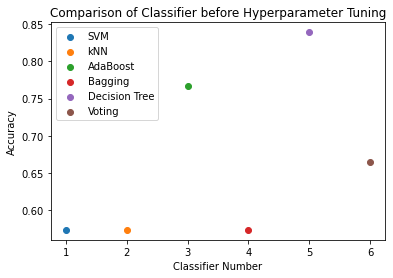

In [28]:
plt.title('Comparison of Classifier before Hyperparameter Tuning')
plt.xlabel('Classifier Number')
plt.ylabel('Accuracy')
plt.scatter(x = 1, y = svm_acc_bef, label = 'SVM')
plt.scatter(x = 2, y = knn_acc_bef, label = 'kNN')
plt.scatter(x = 3, y = ada_boost_acc, label = 'AdaBoost')
plt.scatter(x = 4, y = bagging_acc_bef, label = 'Bagging')
plt.scatter(x = 5, y = dt_acc_bef, label = 'Decision Tree')
plt.scatter(x = 6, y = voting_acc_bef, label = 'Voting')
plt.legend()
plt.show()

# HyperParameter Tuning

We'll use Grid Search CV , in which we will give different parameters for a model and grid search CV will try all those paramteres one by one and retains those parameters on which the performance was maximum.

In [29]:
from sklearn.model_selection import GridSearchCV

# kNN

In [30]:
param_grid = {'n_neighbors':[3,15,33,55]}
kNN = KNeighborsClassifier()
clf = GridSearchCV(kNN, param_grid)
clf.fit(X, y)
clf.best_score_ , clf.best_params_
knn_acc_after = clf.best_score_ 
y_pred = clf.predict(X)
print('Confusion Matrix:\n',confusion_matrix(y, y_pred))
print('Classificatoin Report:\n', classification_report(y, y_pred))

Confusion Matrix:
 [[759  90]
 [ 76 773]]
Classificatoin Report:
               precision    recall  f1-score   support

           1       0.91      0.89      0.90       849
           2       0.90      0.91      0.90       849

    accuracy                           0.90      1698
   macro avg       0.90      0.90      0.90      1698
weighted avg       0.90      0.90      0.90      1698



# SVM

In [31]:
from sklearn.model_selection import GridSearchCV
  
# giving a list of parameters 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.509, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.750, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.538, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.528, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.578, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.538, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.562, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.526, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.534, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.821, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.844, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.782, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.841, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.844, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.788, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.803, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.820, total=   0.6s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.829, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.785, total=   1.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.803, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.706, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.767, total=   1.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.764, total=   0.9s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   33.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [32]:
svm_acc_after = grid.best_score_
grid.best_score_, grid.best_params_

(0.8604390074613917, {'C': 1000, 'gamma': 1, 'kernel': 'rbf'})

In [33]:
y_pred = grid.predict(X)
print('Confusion Matrix:\n',confusion_matrix(y, y_pred))
print('Classificatoin Report:\n', classification_report(y, y_pred))

Confusion Matrix:
 [[820  29]
 [ 43 806]]
Classificatoin Report:
               precision    recall  f1-score   support

           1       0.95      0.97      0.96       849
           2       0.97      0.95      0.96       849

    accuracy                           0.96      1698
   macro avg       0.96      0.96      0.96      1698
weighted avg       0.96      0.96      0.96      1698



# Bagging

In [34]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),n_estimators = 100, max_features = 0.5),param_grid)
clf.fit(X, y)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]})

In [35]:
bagging_acc_after = clf.best_score_
clf.best_score_

0.7856359534964428

In [36]:
y_pred = clf.predict(X)
print('Confusion Matrix:\n',confusion_matrix(y, y_pred))
print('Classificatoin Report:\n', classification_report(y, y_pred))

Confusion Matrix:
 [[703 146]
 [160 689]]
Classificatoin Report:
               precision    recall  f1-score   support

           1       0.81      0.83      0.82       849
           2       0.83      0.81      0.82       849

    accuracy                           0.82      1698
   macro avg       0.82      0.82      0.82      1698
weighted avg       0.82      0.82      0.82      1698



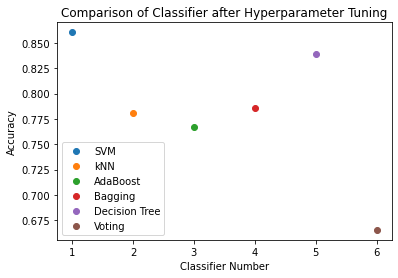

In [37]:
plt.title('Comparison of Classifier after Hyperparameter Tuning')
plt.xlabel('Classifier Number')
plt.ylabel('Accuracy')
plt.scatter(x = 1, y = svm_acc_after, label = 'SVM')
plt.scatter(x = 2, y = knn_acc_after, label = 'kNN')
plt.scatter(x = 3, y = ada_boost_acc, label = 'AdaBoost')
plt.scatter(x = 4, y = bagging_acc_after, label = 'Bagging')
plt.scatter(x = 5, y = dt_acc_bef, label = 'Decision Tree')
plt.scatter(x = 6, y = voting_acc_bef, label = 'Voting')
plt.legend()
plt.show()